In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
data = pd.read_csv('Laptop_Price.csv')

In [4]:
missing_value=data.isnull().sum()

In [5]:
data['Company'] = pd.Categorical(data['Company']).codes
data['Product'] = pd.Categorical(data['Product']).codes
data['TypeName'] = pd.Categorical(data['TypeName']).codes
data['ScreenResolution'] = pd.Categorical(data['ScreenResolution']).codes
data['Cpu'] = pd.Categorical(data['Cpu']).codes
data['Ram'] = pd.Categorical(data['Ram']).codes
data['Memory'] = pd.Categorical(data['Memory']).codes
data['Gpu'] = pd.Categorical(data['Gpu']).codes
data['OpSys'] = pd.Categorical(data['OpSys']).codes
data['Weight'] = pd.Categorical(data['Weight']).codes


X = data.drop('Price_euros', axis=1)
y = data['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test_scaled)


In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 224152.59
R-squared: 0.51


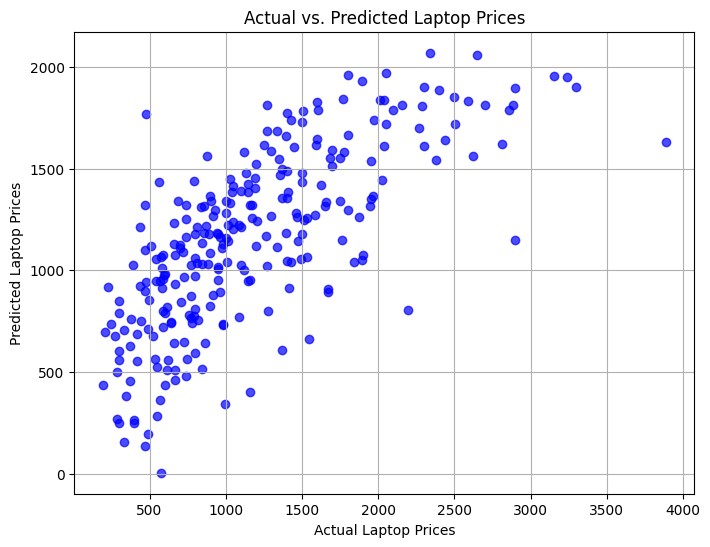

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Laptop Prices')
plt.ylabel('Predicted Laptop Prices')
plt.title('Actual vs. Predicted Laptop Prices')
plt.grid(True)
plt.show()

In [11]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
laptop_ID: 54.32
Company: 41.09
Product: -9.23
TypeName: -6.32
Inches: 110.64
ScreenResolution: 140.25
Cpu: 228.48
Ram: -103.51
Memory: 79.61
Gpu: 162.12
OpSys: 124.75
Weight: -108.79
Intercept: 1109.61
